# Data Collection and Preprocessing

### Import Libraries

In [ ]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

# Add the project root directory to the Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if project_root not in sys.path:
    sys.path.append(project_root)

# Import functions from data_preprocessing.py
from src.data_preprocessing import load_data, check_data, clean_data

### Load Data

In [ ]:
# Define the file path
file_path = '../data/BrentOilPrices.csv'

# Load the data
data = load_data(file_path)

# Display the first few rows of the dataframe
data.head()

/content/data_preprocessing.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(file_path, parse_dates=['Date'], dayfirst=True)


Data loaded successfully


,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


### Check Data Types and Missing Values

In [3]:
# Check data types and missing values
check_data(data)

Data types:
 Date     datetime64[ns]
Price           float64
dtype: object

Missing values in each column:
 Date     0
Price    0
dtype: int64


### Clean Data

In [4]:
# Clean the data
data_clean = clean_data(data)

Missing values removed
Index reset


In [5]:
# Display the first few rows of the cleaned dataframe
data_clean.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


# Exploratory Data Analysis (EDA)

### Summary Statistics

In [6]:
# Get summary statistics of the data
data_clean.describe()

,Date,Price
count,9011,9011.000000
mean,2005-02-10 23:46:53.760958720,48.420782
min,1987-05-20 00:00:00,9.100000
25%,1996-03-20 12:00:00,19.050000
50%,2005-02-02 00:00:00,38.570000
75%,2014-01-09 12:00:00,70.090000
max,2022-11-14 00:00:00,143.950000
std,NaN,32.860110


### Time Series Plot

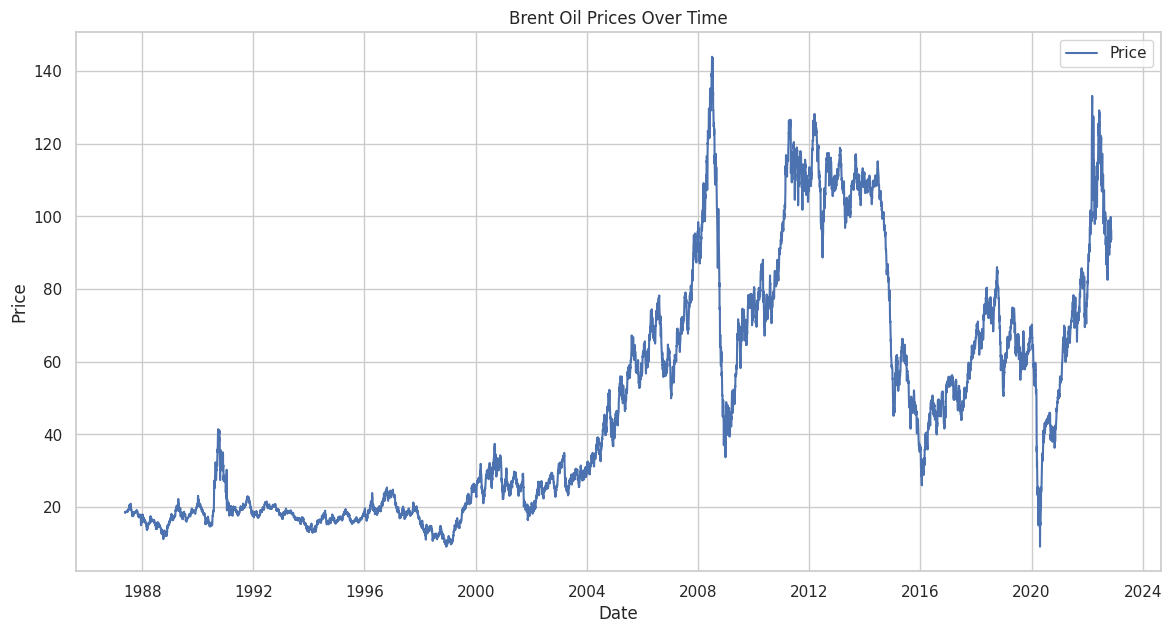

In [7]:
# Plot Brent oil prices over time
plt.figure(figsize=(14, 7))
plt.plot(data_clean['Date'], data_clean['Price'], label='Price')
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### Distribution Plot

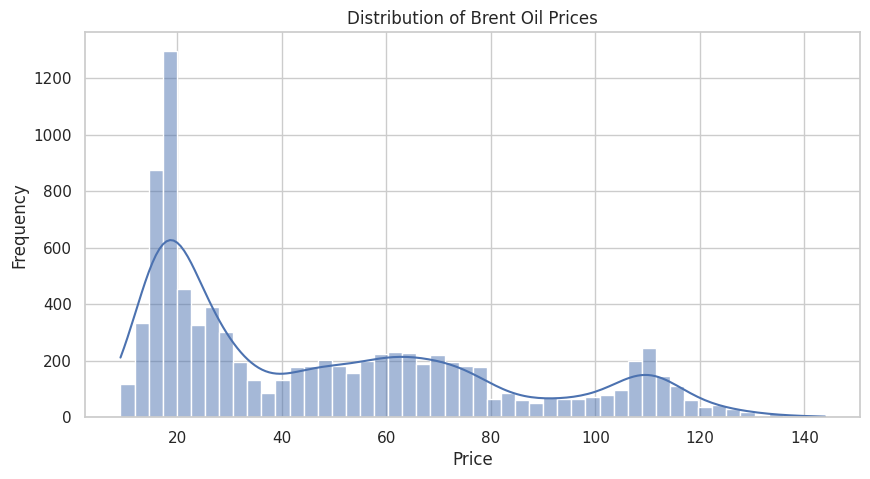

In [8]:
# Plot the distribution of Brent oil prices
plt.figure(figsize=(10, 5))
sns.histplot(data_clean['Price'], bins=50, kde=True)
plt.title('Distribution of Brent Oil Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Moving Average

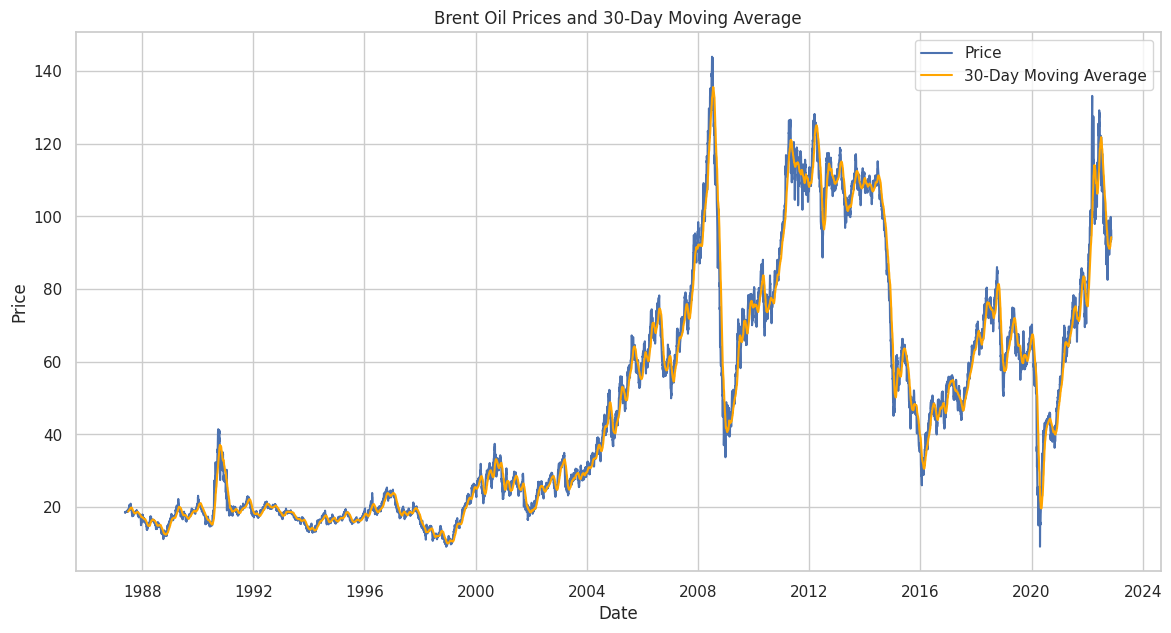

In [9]:
# Calculate and plot the moving average of oil prices
data_clean['Price_MA30'] = data_clean['Price'].rolling(window=30).mean()

plt.figure(figsize=(14, 7))
plt.plot(data_clean['Date'], data_clean['Price'], label='Price')
plt.plot(data_clean['Date'], data_clean['Price_MA30'], label='30-Day Moving Average', color='orange')
plt.title('Brent Oil Prices and 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Further Analysis: Dive Deeper into Patterns and Trends, Including Seasonal Analysis

To dive deeper into patterns and trends, including seasonal analysis, we can perform the following steps:

1. Decompose the Time Series: Decompose the Brent oil prices data into trend, seasonal, and residual components.
2. Seasonal Analysis: Analyze and visualize the seasonal component.
3. Correlation Analysis: Analyze autocorrelations to understand the relationships between different lags.

### Decompose the Time Series

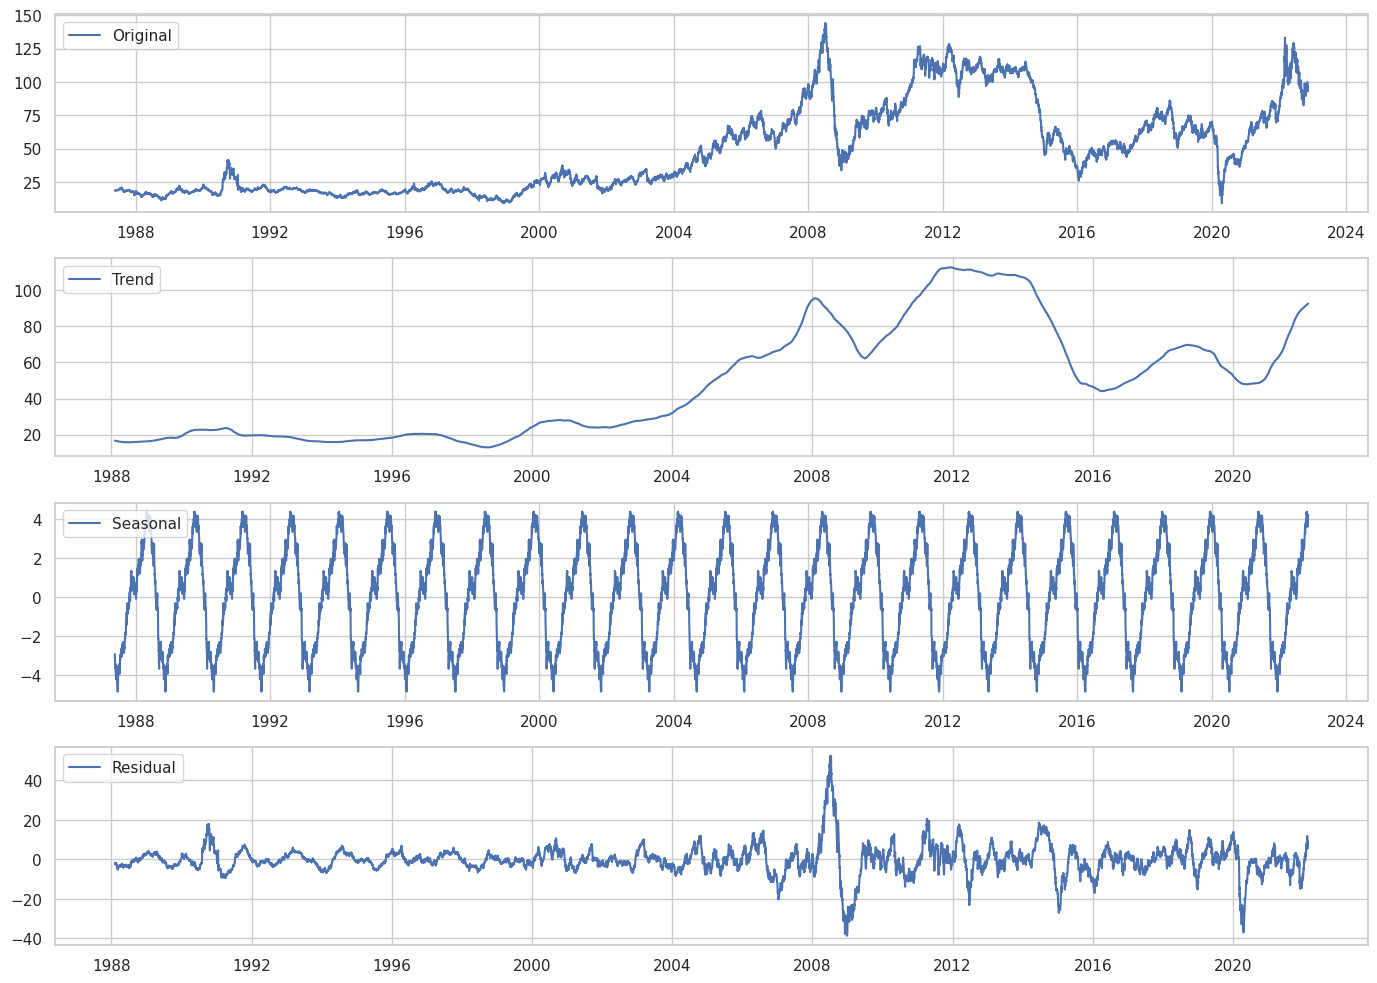

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(data_clean['Price'], model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(data_clean['Date'], data_clean['Price'], label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(data_clean['Date'], decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(data_clean['Date'], decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(data_clean['Date'], decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

### Seasonal Analysis

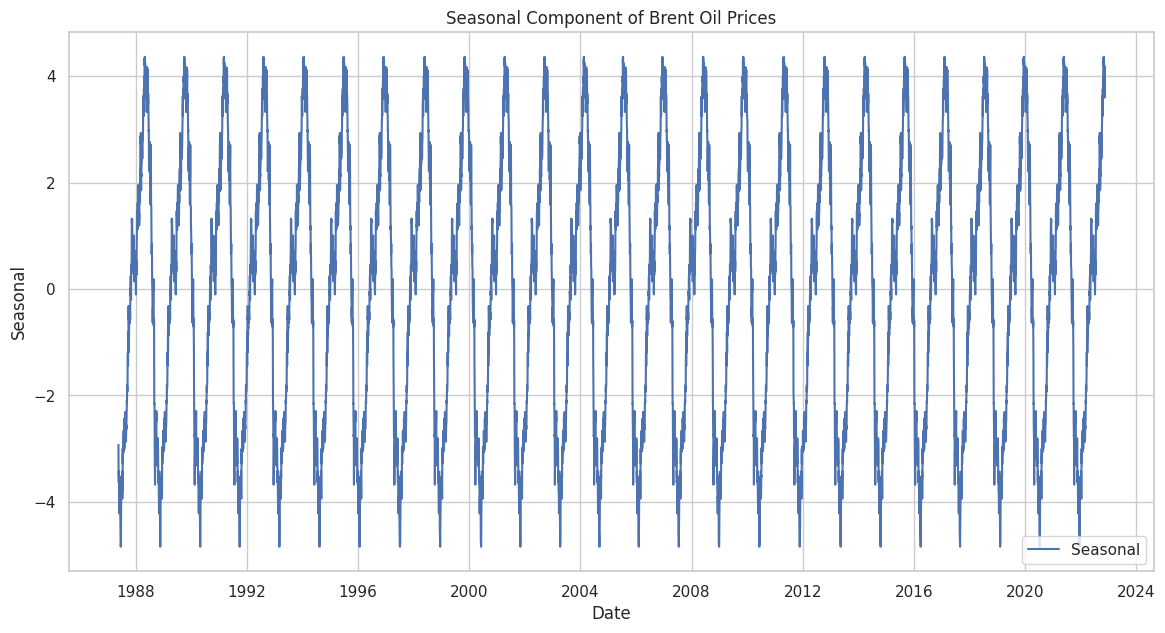

In [11]:
# Plot seasonal component
plt.figure(figsize=(14, 7))
plt.plot(data_clean['Date'], decomposition.seasonal, label='Seasonal')
plt.title('Seasonal Component of Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Seasonal')
plt.legend()
plt.show()

## Correlation Analysis

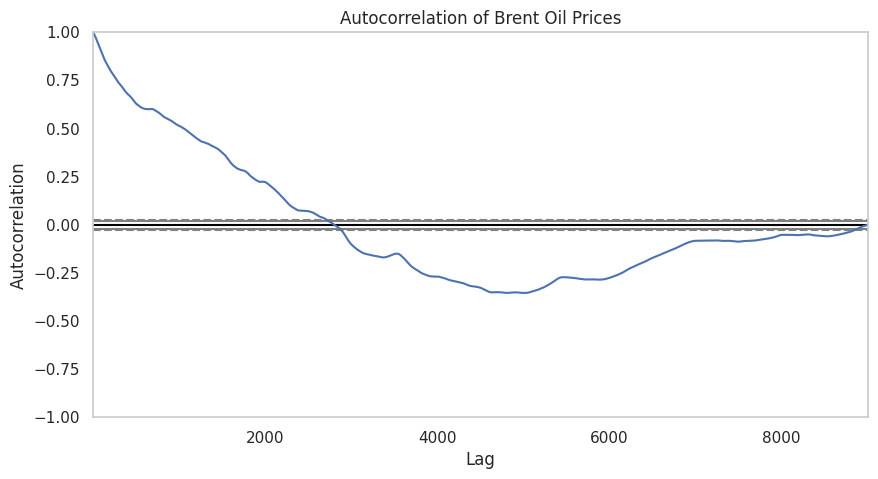

In [12]:
from pandas.plotting import autocorrelation_plot

# Plot autocorrelation
plt.figure(figsize=(10, 5))
autocorrelation_plot(data_clean['Price'])
plt.title('Autocorrelation of Brent Oil Prices')
plt.show()

# Feature Engineering: Create New Features for Predictive Modeling

For feature engineering, we can create several new features, including moving averages, rolling statistics, and lagged values.

### Create New Features

In [13]:
# Create moving averages
data_clean['Price_MA30'] = data_clean['Price'].rolling(window=30).mean()
data_clean['Price_MA90'] = data_clean['Price'].rolling(window=90).mean()

# Create rolling statistics
data_clean['Price_Rolling_STD30'] = data_clean['Price'].rolling(window=30).std()
data_clean['Price_Rolling_STD90'] = data_clean['Price'].rolling(window=90).std()

# Create lagged values
data_clean['Price_Lag1'] = data_clean['Price'].shift(1)
data_clean['Price_Lag7'] = data_clean['Price'].shift(7)
data_clean['Price_Lag30'] = data_clean['Price'].shift(30)

# Drop rows with missing values generated by the lag and rolling operations
data_clean = data_clean.dropna()

# Display the first few rows of the dataframe with new features
data_clean.head()

,Date,Price,Price_MA30,Price_MA90,Price_Rolling_STD30,Price_Rolling_STD90,Price_Lag1,Price_Lag7,Price_Lag30
89,1987-09-23,18.48,18.312333,18.999556,0.432177,0.766040,18.48,18.15,19.50
90,1987-09-24,18.68,18.288333,19.000111,0.387361,0.765787,18.48,18.53,19.40
91,1987-09-25,18.60,18.266667,19.001778,0.347884,0.764739,18.68,18.53,19.25
92,1987-09-28,18.65,18.260000,19.002889,0.338098,0.764148,18.60,18.43,18.85
93,1987-09-29,18.50,18.251667,19.001778,0.328550,0.764813,18.65,18.30,18.75


Explanation
1. Decomposes the time series into trend, seasonal, and residual components and plots them.
2. Plots the seasonal component to visualize seasonal patterns.
3. Plots the autocorrelation to analyze relationships between different lags.
4. Creates new features, including moving averages, rolling statistics, and lagged values, and displays the updated dataframe.

In [15]:
# Save the cleaned dataframe to a CSV file in the current directory
csv_file_path = 'cleaned_data_with_features.csv'
data_clean.to_csv(csv_file_path, index=False)

print(f"DataFrame saved to {csv_file_path}")


DataFrame saved to cleaned_data_with_features.csv
